In [112]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

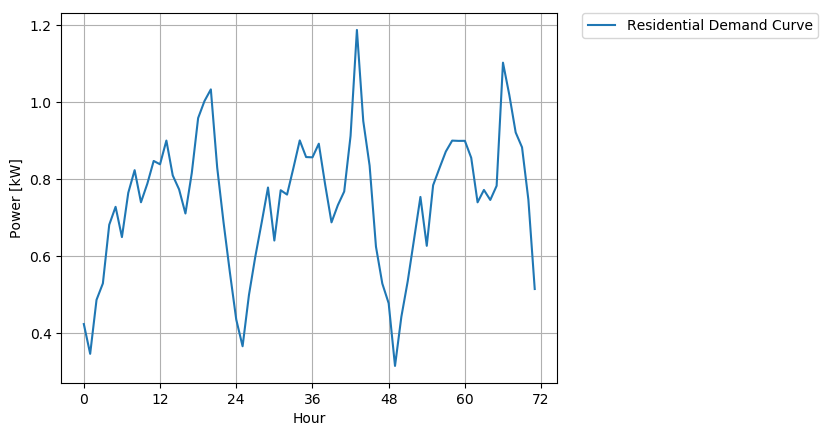

In [95]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

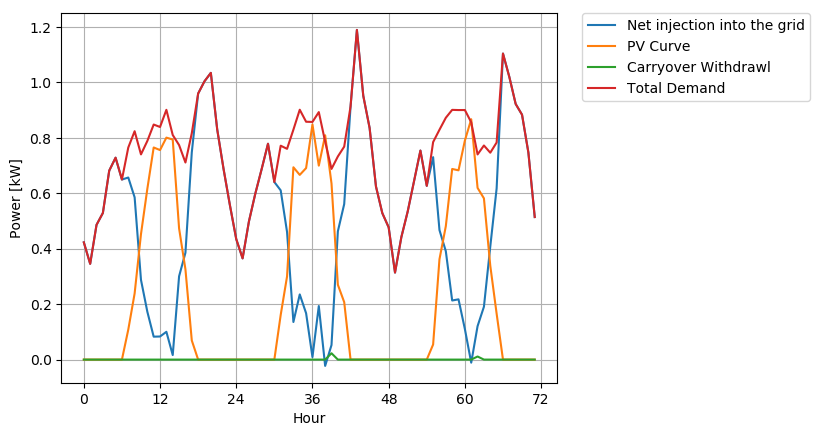

In [96]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

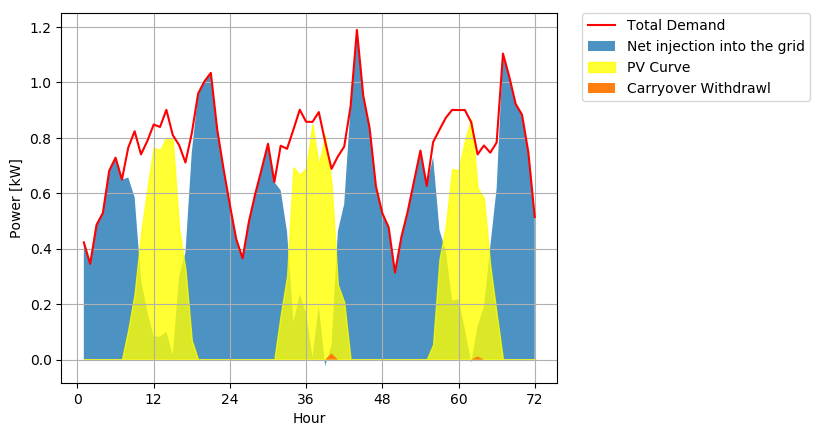

In [97]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [98]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 546.1 190.33  | 0.4 0.4 355.77 0.0  | 190.33 0.4 93.26 0.4  | 0.0 
2 544.52 138.91  | 0.0 0.0 405.61 0.0  | 329.24 0.4 160.93 0.0  | 0.0 
3 552.21 146.51  | 0.0 0.0 405.7 0.0  | 475.75 0.4 232.71 0.0  | 0.0 
4 542.16 178.34  | 0.3 0.3 363.82 0.0  | 654.09 0.71 320.1 0.3  | 0.0 
5 558.91 192.28  | 0.27 0.27 366.63 0.0  | 846.37 0.97 414.02 0.27  | 0.0 
6 553.34 178.17  | 0.23 0.23 375.17 0.0  | 1024.55 1.2 501.06 0.23  | 0.0 
7 540.94 169.85  | 0.3 0.3 371.1 0.0  | 1194.39 1.5 584.05 0.3  | 0.0 
8 546.98 178.76  | 0.45 0.45 368.22 0.0  | 1373.15 1.95 671.34 0.45  | 0.0 
9 536.44 187.97  | 0.05 0.05 348.48 0.0  | 1561.12 2.0 763.0 0.05  | 0.0 
10 558.28 172.51  | 0.41 0.41 385.77 0.0  | 1733.63 2.42 847.48 0.41  | 0.0 
11 558.09 170.86  | 0.01 0.01 387.23 0.0  | 1904.49 2.43 930.78 0.01  | 0.0 
12 561.53 178.41  | 

### Billings case residential 1

In [99]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
118505.89 8.49 118514.38  | 140207.1 21692.72
124188.22 0.0 124188.22  | 140027.24 15839.02
124199.0 0.0 124199.0  | 140903.63 16704.63
119423.22 6.35 119429.58  | 139757.84 20328.26
119743.88 5.58 119749.46  | 141667.8 21918.34
120717.34 4.76 120722.1  | 141032.75 20310.65
120253.47 6.4 120259.87  | 139619.26 19359.38
119925.28 9.39 119934.67  | 140307.76 20373.08
117674.13 1.13 117675.26  | 139106.02 21430.76
121926.64 8.72 121935.36  | 141596.17 19660.82
122093.18 0.19 122093.37  | 141574.23 19480.86
121624.69 17.68 121642.37  | 141967.21 20324.84


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [100]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

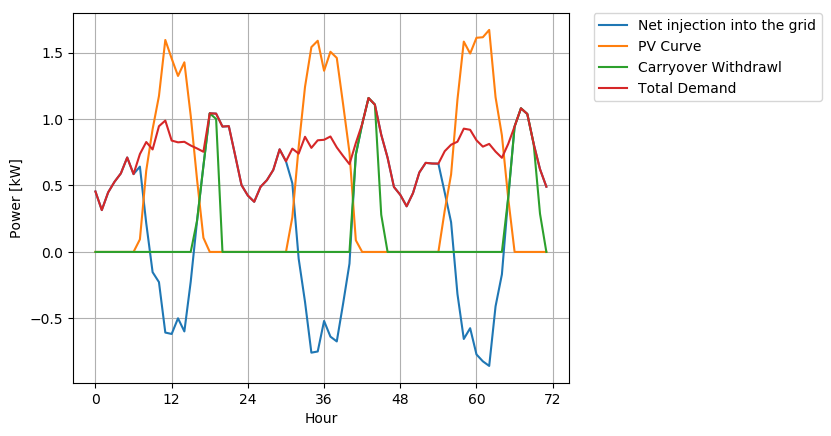

In [101]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

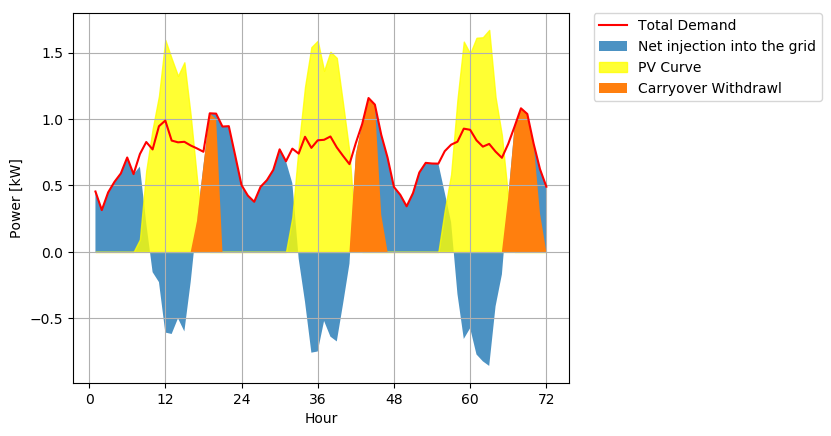

In [102]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [103]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 546.93 380.17  | 136.34 136.34 166.76 0.0  | 380.17 136.34 186.28 136.34  | 0.0 
2 545.07 276.21  | 71.43 71.43 268.86 0.0  | 656.37 207.78 185.28 71.43  | 0.0 
3 553.22 311.59  | 89.42 89.42 241.63 0.0  | 967.96 297.2 266.53 89.42  | 0.0 
4 541.87 316.81  | 93.16 93.16 225.06 0.0  | 1284.78 390.36 332.34 93.16  | 0.0 
5 555.48 355.13  | 112.33 112.33 200.35 0.0  | 1639.91 502.69 413.2 112.33  | 0.0 
6 556.7 320.96  | 80.34 80.34 235.73 0.0  | 1960.87 583.02 458.14 80.34  | 0.0 
7 537.22 351.12  | 114.13 114.13 186.11 0.0  | 2311.99 697.15 549.85 114.13  | 0.0 
8 548.06 365.24  | 113.99 113.99 182.82 0.0  | 2677.23 811.14 614.69 113.99  | 0.0 
9 538.7 326.78  | 87.66 87.66 211.92 0.0  | 3004.01 898.8 660.82 87.66  | 0.0 
10 559.19 342.42  | 107.38 107.38 216.77 0.0  | 3346.42 1006.18 740.94 107.38  | 0.0 
11 558.

### Billings case residential 2

In [104]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
74512.07 2867.33 77379.4  | 140301.61 62922.21
86652.14 1502.21 88154.35  | 140089.36 51935.01
83648.34 1880.6 85528.94  | 141019.01 55490.07
81821.09 1959.05 83780.14  | 139725.12 55944.98
79057.0 2362.31 81419.31  | 141276.47 59857.16
82998.46 1689.48 84687.94  | 141415.78 56727.84
75902.31 2400.11 78302.42  | 139195.13 60892.71
75666.16 2397.27 78063.43  | 140430.54 62367.11
80371.33 1843.47 82214.8  | 139363.42 57148.62
80906.91 2258.1 83165.01  | 141699.47 58534.46
81498.37 1823.03 83321.4  | 141669.54 58348.14
79208.19 2565.22 81773.41  | 141395.31 59621.9


## Residential Case 3: Large PV System that generates multi-day carry over

In [105]:
PVRes.capacity = 3.0
ts=simulate(residential, PVRes, 3);

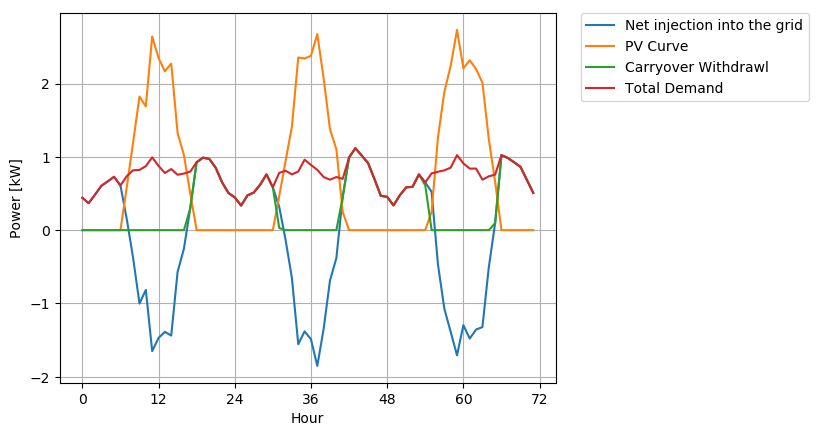

In [106]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

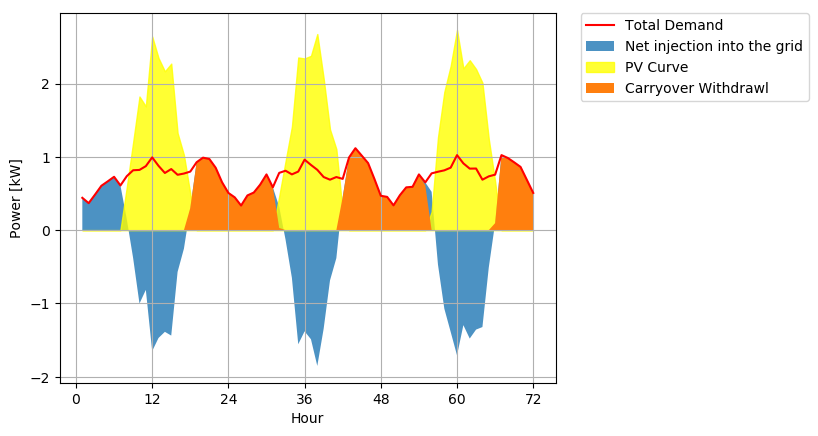

In [107]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [92]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 546.97 549.12  | 296.55 294.41 0.0 0.0  | 549.12 294.41 269.07 269.07  | 2.14 
2 545.04 435.46  | 197.71 197.71 109.58 0.0  | 984.57 492.12 188.03 188.03  | 0.0 
3 550.35 452.31  | 215.85 215.4 98.49 0.0  | 1436.89 707.52 211.95 211.95  | 0.45 
4 540.69 500.06  | 243.19 241.35 42.48 0.24  | 1936.95 948.87 241.58 241.58  | 1.85 
5 556.29 499.87  | 253.96 252.59 57.79 0.0  | 2436.82 1201.46 245.17 245.17  | 1.61 
6 556.42 531.42  | 263.89 261.39 27.49 0.0  | 2968.24 1462.86 252.98 252.98  | 2.49 
7 538.65 542.84  | 294.56 290.36 0.0 0.0  | 3511.08 1753.22 257.57 257.57  | 4.19 
8 547.51 517.76  | 257.36 255.41 31.7 0.0  | 4028.84 2008.63 220.92 220.92  | 1.95 
9 536.8 541.82  | 283.18 278.16 0.0 0.0  | 4570.66 2286.79 231.0 231.0  | 5.02 
10 557.88 499.85  | 253.15 251.57 59.62 0.0  | 5070.51 2538.36 197.76 197.76 

### Billings case residential 3

In [108]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
74512.07 2867.33 77379.4  | 140301.61 62922.21
86652.14 1502.21 88154.35  | 140089.36 51935.01
83648.34 1880.6 85528.94  | 141019.01 55490.07
81821.09 1959.05 83780.14  | 139725.12 55944.98
79057.0 2362.31 81419.31  | 141276.47 59857.16
82998.46 1689.48 84687.94  | 141415.78 56727.84
75902.31 2400.11 78302.42  | 139195.13 60892.71
75666.16 2397.27 78063.43  | 140430.54 62367.11
80371.33 1843.47 82214.8  | 139363.42 57148.62
80906.91 2258.1 83165.01  | 141699.47 58534.46
81498.37 1823.03 83321.4  | 141669.54 58348.14
79208.19 2565.22 81773.41  | 141395.31 59621.9


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

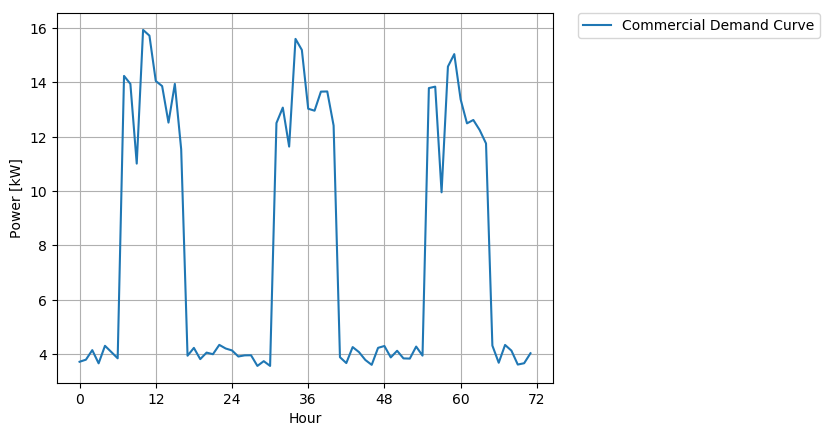

In [113]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

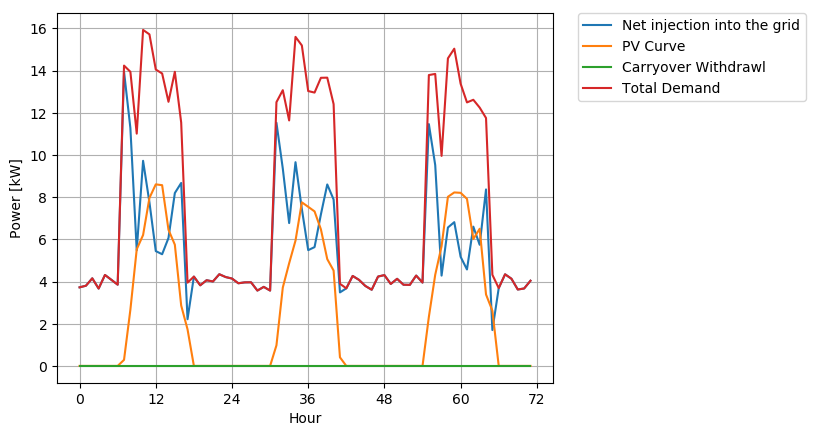

In [114]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

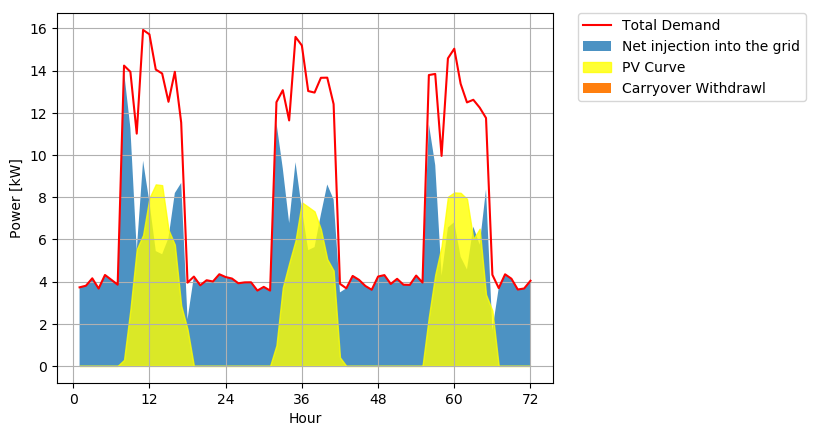

In [115]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [8]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 5968.21 3694.68  | 185.39 185.39 2273.53 0.0  | 17.81 8.79  | 3694.68 185.39 1810.39 185.39  | 0.0 
2 6137.07 2527.42  | 19.92 19.92 3609.65 0.0  | 20.13 15.12  | 6222.11 205.31 2863.44 19.92  | 0.0 
3 5824.9 2575.13  | 39.47 39.47 3249.76 0.0  | 20.13 15.12  | 8797.24 244.78 4105.33 39.47  | 0.0 
4 6033.26 3019.5  | 7.61 7.61 3013.77 0.0  | 20.13 15.12  | 11816.74 252.4 5545.42 7.61  | 0.0 
5 6434.24 3167.89  | 80.97 80.97 3266.35 0.0  | 20.13 15.12  | 14984.62 333.37 7090.07 80.97  | 0.0 
6 6232.87 3200.64  | 20.6 20.6 3032.22 0.0  | 20.13 15.12  | 18185.26 353.97 8577.41 20.6  | 0.0 
7 5967.99 3067.46  | 10.12 10.12 2900.53 0.0  | 20.13 15.12  | 21252.73 364.09 10059.87 10.12  | 0.0 
8 6024.16 3206.91  | 30.25 30.25 2817.25 0.0  | 20.13 15.12  | 24459.63 394.33 11621.13 30.25  | 0.0 


In [9]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
276142.77 3898.78 280041.55 0.0  | 436395.62 203898.61  | 156354.07 203898.61
263937.49 418.95 264356.44 173060.43  | 448742.62 230355.28  | 184386.18 57294.85
237622.64 830.06 238452.7 173060.43  | 425916.34 230355.28  | 187463.64 57294.85
220366.67 160.12 220526.8 173060.43  | 441152.33 230355.28  | 220625.53 57294.85
238835.68 1702.86 240538.54 173060.43  | 470471.44 230355.28  | 229932.9 57294.85
221716.14 433.14 222149.27 173060.43  | 455747.2 230355.28  | 233597.93 57294.85
352298.51 212.83 352511.34 0.0  | 436379.64 230355.28  | 83868.3 230355.28
342183.26 636.12 342819.38 0.0  | 440486.33 230355.28  | 97666.95 230355.28
331752.15 1210.88 332963.03 0.0  | 431605.3 230355.28  | 98642.27 230355.28
304342.59 1733.5 306076.09 0.0  | 417762.9 230355.28  | 111686.81 230355.28
341465.3 1969.06 343434.36 0.0  | 432893.31 230355.28  | 894

## Commercial case 2: medium PV system

In [116]:
PVComInd.capacity = 18.0
ts=simulate(commercial, PVComInd, 3);

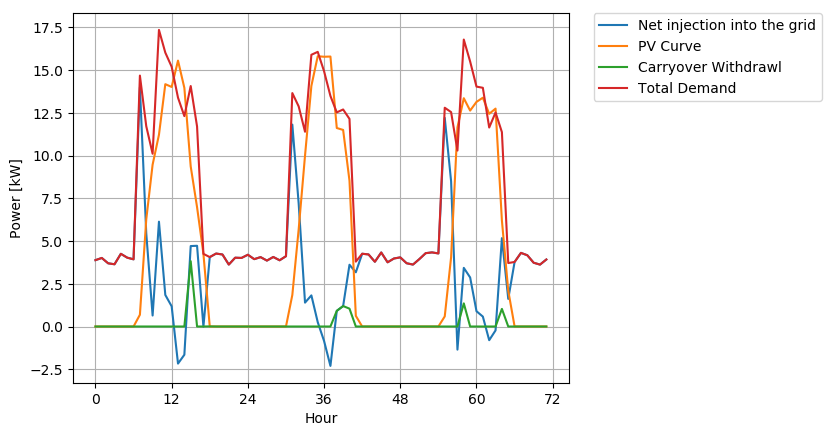

In [117]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

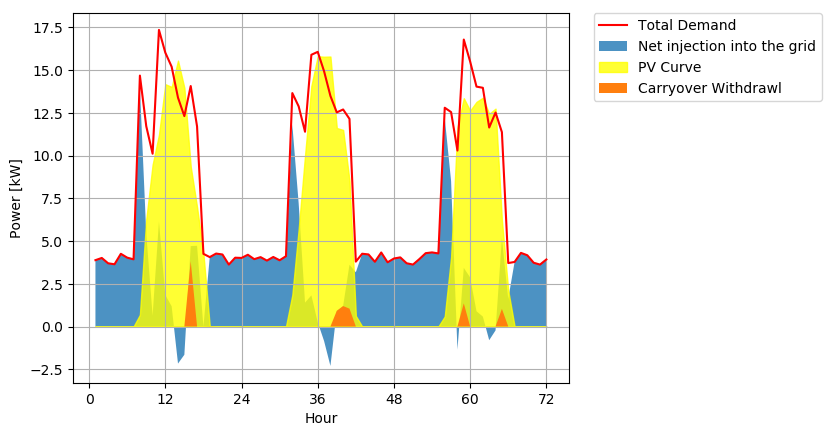

In [118]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [119]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 5967.72 3414.82  | 78.07 78.07 2552.9 0.0  | 17.82 11.48  | 3414.82 78.07 1673.26 78.07  | 0.0 
2 6102.45 2277.5  | 16.48 16.48 3824.96 0.0  | 20.06 15.14  | 5692.32 94.55 2711.17 16.48  | 0.0 
3 5822.64 2600.75  | 49.98 49.98 3221.9 0.0  | 20.06 15.14  | 8293.07 144.53 3969.06 49.98  | 0.0 
4 6029.32 3091.97  | 0.21 0.21 2937.35 0.0  | 20.06 15.14  | 11385.04 144.73 5434.14 0.21  | 0.0 
5 6409.2 2917.59  | 73.21 73.21 3491.61 0.0  | 20.06 15.14  | 14302.63 217.95 6863.55 73.21  | 0.0 
6 6242.29 3138.38  | 79.26 79.26 3103.91 0.0  | 20.06 15.14  | 17441.01 297.21 8328.15 79.26  | 0.0 
7 5928.28 3249.01  | 18.61 18.61 2679.27 0.0  | 20.06 15.14  | 20690.02 315.82 9840.9 18.61  | 0.0 
8 6009.09 2915.72  | 9.45 9.45 3093.37 0.0  | 20.06 15.14  | 23605.74 325.27 11250.99 9.45  | 0.0 
9 5902.

In [120]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
310075.13 1641.82 311716.95 0.0  | 436359.99 204024.13  | 124643.04 204024.13
279680.95 346.5 280027.45 173292.96  | 446211.5 229603.64  | 166184.05 56310.68
235585.03 1051.05 236636.08 173292.96  | 425751.7 229603.64  | 189115.62 56310.68
356770.98 4.35 356775.33 0.0  | 440863.98 229603.64  | 84088.65 229603.64
255306.81 1539.68 256846.49 173292.96  | 468640.95 229603.64  | 211794.46 56310.68
226957.76 1666.88 228624.65 173292.96  | 456436.33 229603.64  | 227811.69 56310.68
325423.74 391.41 325815.15 0.0  | 433475.63 229603.64  | 107660.48 229603.64
226187.15 198.8 226385.94 173292.96  | 439384.57 229603.64  | 212998.62 56310.68
350697.04 498.9 351195.94 0.0  | 431586.9 229603.64  | 80390.95 229603.64
298875.59 1195.58 300071.17 0.0  | 415661.34 229603.64  | 115590.17 229603.64
219690.88 240.91 219931.79 173292.96  | 436258.05 229603.6

## Commercial case 3: Large PV system

In [128]:
PVComInd.capacity = 28.0
ts=simulate(commercial, PVComInd, 3);

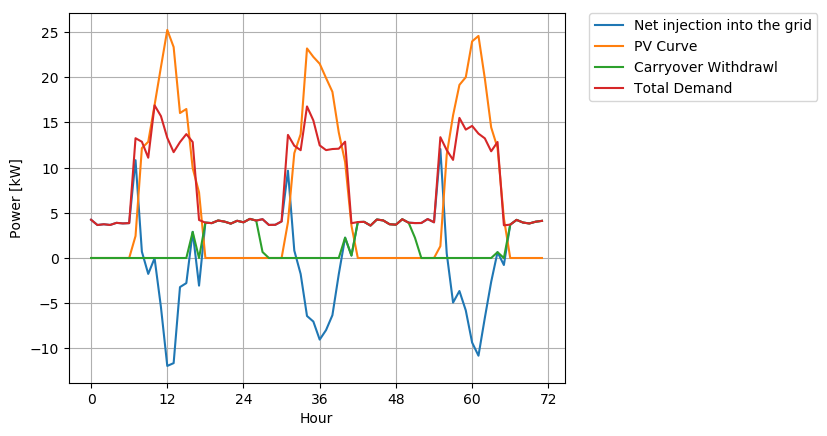

In [129]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

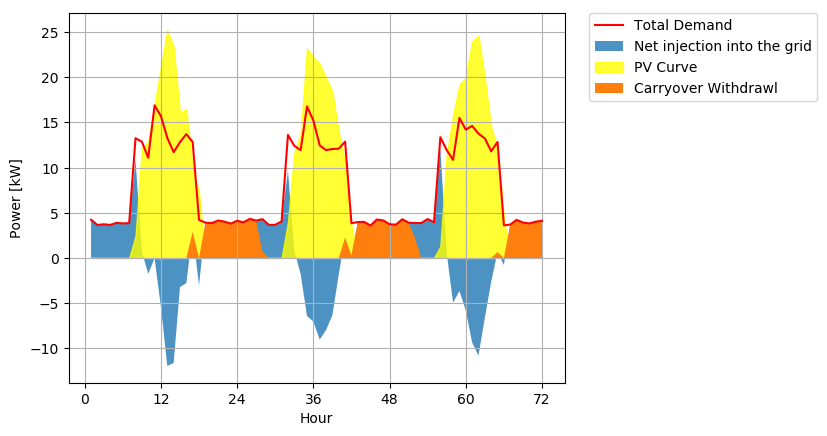

In [130]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [131]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy carry_over  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus 
1 5973.08 5808.73  | 1788.74 1762.51 190.58 26.23  | 17.77 8.03  | 5808.73 1762.51 2846.28 1788.74  | 26.23 
2 6108.87 3874.72  | 438.29 464.52 2207.92 0.0  | 20.21 15.16  | 9683.45 2227.02 2982.38 464.52  | 0.0 
3 5808.24 4269.17  | 825.78 825.78 1539.07 0.0  | 20.21 15.16  | 13952.62 3052.8 4609.76 825.78  | 0.0 
4 6042.71 4701.9  | 803.72 803.72 1340.82 0.0  | 20.21 15.16  | 18654.51 3856.52 6087.91 803.72  | 0.0 
5 6439.93 4931.28  | 829.71 829.71 1508.65 0.0  | 20.21 15.16  | 23585.8 4686.24 7700.52 829.71  | 0.0 
6 6246.24 4324.43  | 603.21 603.21 1921.82 0.0  | 20.21 15.16  | 27910.23 5289.44 8989.77 603.21  | 0.0 
7 5982.31 4684.6  | 772.64 772.64 1297.72 0.0  | 20.21 15.16  | 32594.82 6062.08 10682.02 772.64  | 0.0 
8 6016.8 4800.29  | 1051.46 1051.46 1216.51 0.0  | 20.21 15.16  |

In [132]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
23148.09 37065.53 60213.62 0.0  | 436751.91 203401.39  | 376538.28 203401.39
268174.32 9768.77 277943.09 0.0  | 446680.64 231276.29  | 168737.55 231276.29
186935.32 17366.09 204301.41 0.0  | 424698.31 231276.29  | 220396.89 231276.29
162855.45 16902.27 179757.72 0.0  | 441843.09 231276.29  | 262085.37 231276.29
183240.05 17448.88 200688.93 0.0  | 470887.68 231276.29  | 270198.76 231276.29
233423.66 12685.48 246109.14 0.0  | 456725.14 231276.29  | 210616.0 231276.29
157620.64 16248.59 173869.23 0.0  | 437426.77 231276.29  | 263557.54 231276.29
147757.59 22112.3 169869.89 0.0  | 439948.56 231276.29  | 270078.67 231276.29
148506.47 21055.59 169562.06 0.0  | 431846.15 231276.29  | 262284.09 231276.29
104653.9 25893.42 130547.32 0.0  | 415756.33 231276.29  | 285209.01 231276.29
156267.25 20212.11 176479.37 0.0  | 433225.24 231276.29  | 25674

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

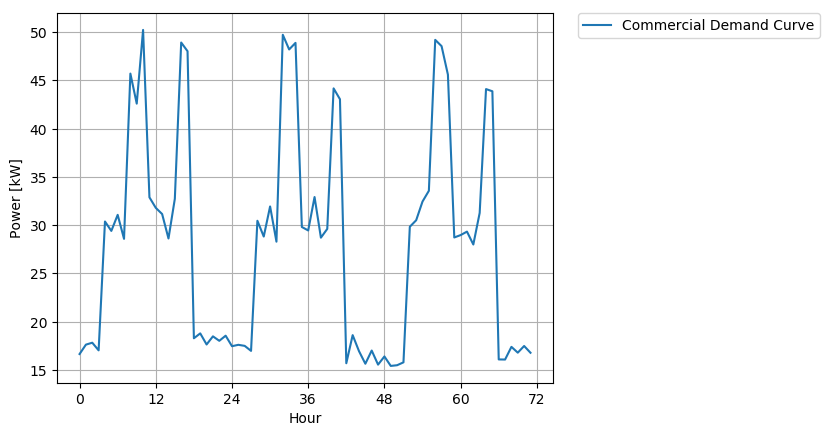

In [134]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

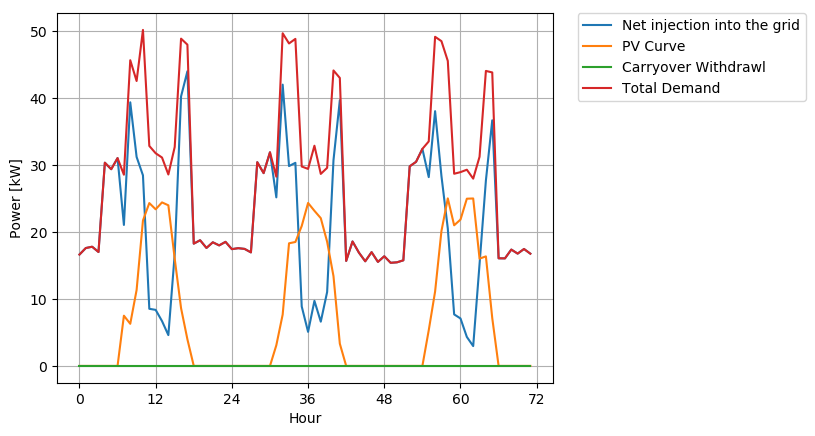

In [135]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

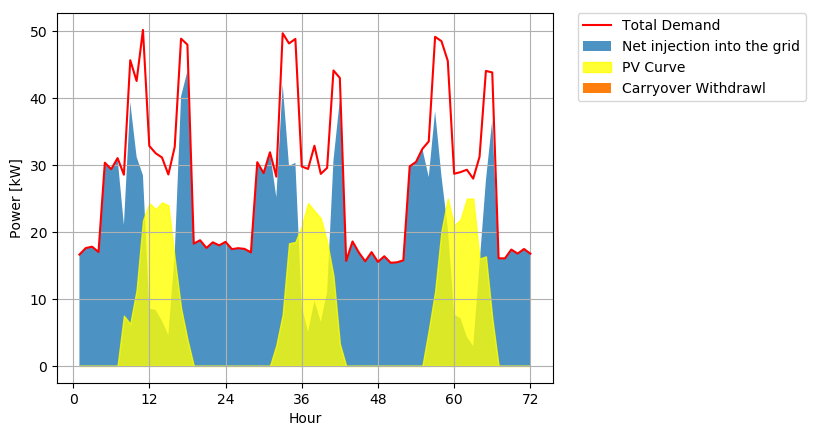

In [136]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [140]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7192.26 8075.08 8075.08  | 5659.46 0.0 0.0  | 4876.5 4731.39 5750.91  | 0.0  | 50.79 50.8 33.82  | 50.61 33.84 33.82  | 5659.46 0.0 2773.13 0.0  | 0.0 
2 | 6650.76 7446.2 7446.2  | 3643.94 0.0 0.0  | 5031.71 5421.31 5263.92  | 0.0  | 51.66 51.25 34.42  | 51.63 37.54 34.42  | 9303.4 0.0 4558.66 0.0  | 0.0 
3 | 7233.77 8082.41 8082.41  | 4389.45 0.0 0.0  | 5418.68 5508.05 5688.4  | 0.0  | 51.66 51.25 34.42  | 51.63 37.54 34.42  | 13692.85 0.0 6709.5 0.0  | 0.0 
4 | 7455.9 8413.71 8413.71  | 5001.5 0.0 0.0  | 5187.76 5680.34 5936.01  | 0.0  | 54.23 54.02 36.21  | 54.23 38.98 36.21  | 18694.35 0.0 9160.23 0.0

In [141]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
302147.74 146625.78 128302.82  | 0.0  | 302147.74 146625.78 128302.82  | 445632.41 250246.88 180155.14  | 143484.67 103621.1 51852.33  | 1935.86 131136.7 0.0 
311764.68 168006.4 117438.14  | 0.0  | 311764.68 168006.4 117438.14  | 412080.9 230757.76 166124.74  | 100316.23 62751.36 48686.6  | 329.91 105984.96 0.0 
335741.25 170694.41 126908.13  | 0.0  | 335741.25 170694.41 126908.13  | 448204.21 250473.9 180318.58  | 112462.95 79779.49 53410.44  | 329.91 105984.96 0.0 
321433.54 176033.85 132432.41  | 0.0  | 321433.54 176033.85 132432.41  | 461967.42 260740.79 1877

## TMT Case2: Medium PV System

In [142]:
PVTMT.capacity = 60
ts=simulate(mediumvoltage, PVTMT, 3);

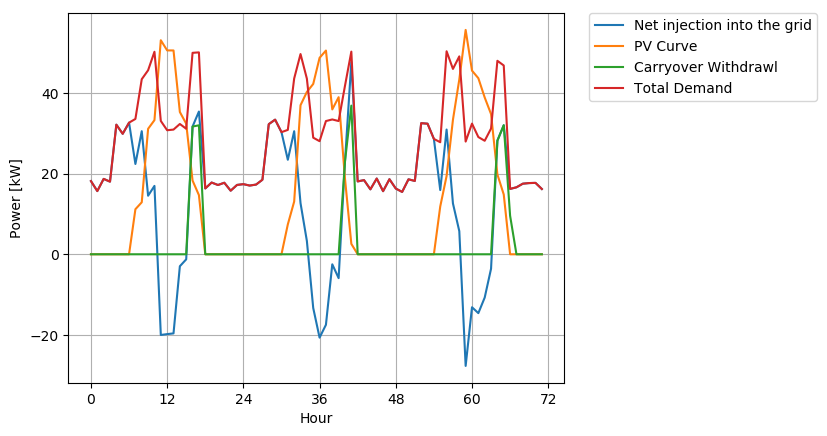

In [143]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

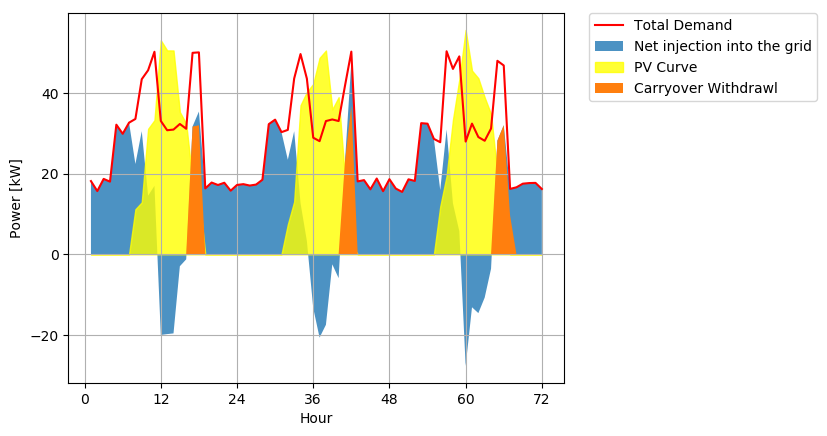

In [144]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [145]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7161.8 8090.59 8090.59  | 11212.76 1679.85 1679.85  | 1646.58 2393.05 5716.46  | 0.0  | 50.69 49.89 33.79  | 50.69 33.82 33.79  | 11212.76 1679.85 5494.25 1679.85  | 0.0 
2 | 6596.74 7448.41 7448.41  | 8614.78 876.14 876.14  | 3315.75 2114.62 5219.87  | 0.0  | 51.64 51.63 34.17  | 51.55 34.16 34.17  | 19827.54 2555.99 8035.64 876.14  | 0.0 
3 | 7193.82 8104.65 8104.65  | 8556.92 739.28 739.28  | 3848.43 2893.12 5752.89  | 0.0  | 51.64 51.63 34.17  | 51.55 34.16 34.17  | 28384.45 3295.28 11352.39 739.28  | 0.0 
4 | 7479.05 8394.09 8394.09  | 9697.46 659.41 659.41  | 3520.05 2655.64 5936.27  | 0.0  | 54.38 

In [146]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
102022.23 74160.73 127534.25  | 35327.32  | 102022.23 74160.73 127534.25  | 443745.3 250727.37 180501.05  | 341723.07 176566.64 52966.8  | 0.0 124232.86 0.0 
205443.74 65532.07 116455.38  | 18425.21  | 205443.74 65532.07 116455.38  | 408733.83 230826.21 166174.02  | 203290.09 165294.14 49718.64  | 1015.13 135075.95 0.0 
238448.82 89657.92 128347.01  | 15547.12  | 238448.82 89657.92 128347.01  | 445729.07 251163.24 180814.84  | 207280.24 161505.32 52467.83  | 1015.13 135075.95 0.0 
218102.06 82298.15 132438.27  | 13867.32  | 218102.06 82298.15 132438.27  | 463401.

## TMT Case 3: Large PV System

In [147]:
PVTMT.capacity = 100
ts=simulate(mediumvoltage, PVTMT, 3);

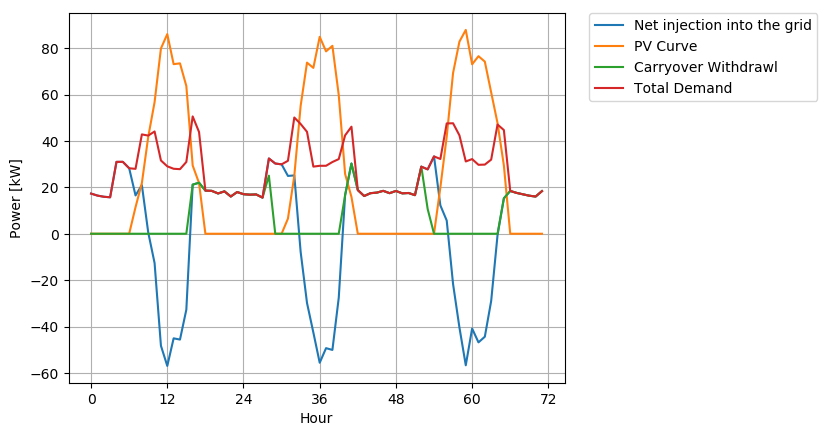

In [148]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

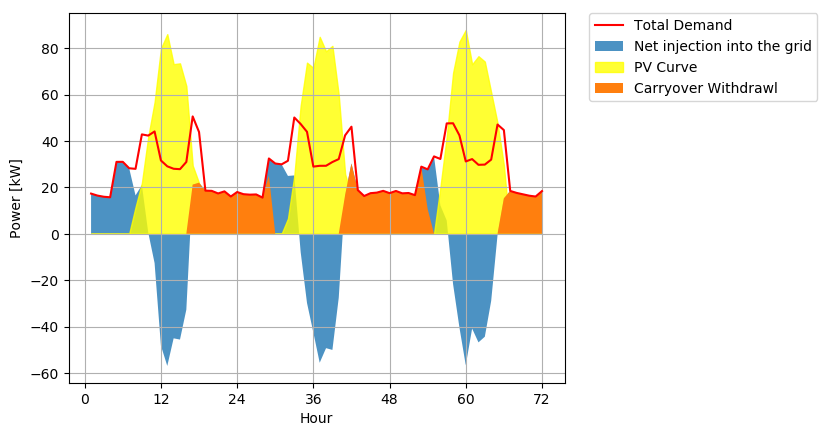

In [149]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [150]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | real_surplus
1 | 7254.95 8165.16 8165.16  | 17305.57 6512.44 6512.44  | 0.0 1567.85 2248.07  | 0.0  | 50.62 50.51 33.29  | 50.45 33.78 33.29  | 17305.57 6512.44 8479.73 6512.44  | 0.0 
2 | 6637.49 7483.79 7483.79  | 13429.32 4317.73 4317.73  | 0.0 1827.55 4117.27  | 0.0  | 51.48 50.51 33.69  | 51.39 33.97 33.69  | 30734.9 10830.17 8547.66 4317.73  | 0.0 
3 | 7177.86 8085.74 8085.74  | 15332.05 4945.94 4945.94  | 0.0 1290.27 4379.01  | 0.0  | 51.48 50.51 33.87  | 51.39 33.97 33.87  | 46066.95 15776.11 11742.63 4945.94  | 0.0 
4 | 7446.12 8409.75 8409.75  | 17133.17 5949.33 5949.33  | 0.0 1635.45 3008.19  | 0.0  | 54.31 54.

In [151]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
0.0 48587.67 50154.55  | 136956.69  | 0.0 48587.67 50154.55  | 449516.6 253038.35 182164.75  | 449516.6 204450.68 132010.2  | 1779.04 129315.11 0.0 
0.0 56635.75 91856.39  | 90801.81  | 0.0 56635.75 91856.39  | 411258.96 231922.53 166963.26  | 411258.96 175286.78 75106.87  | 952.29 127814.37 0.0 
0.0 39985.58 97695.74  | 104013.1  | 0.0 39985.58 97695.74  | 444740.09 250577.08 180392.86  | 444740.09 210591.49 82697.12  | 952.29 127814.37 0.0 
0.0 50682.58 67112.65  | 125114.49  | 0.0 50682.58 67112.65  | 461361.63 260618.01 187621.42  | 461361.63 209935.42 120508